# Convolutional Neural Network
## 1. Object Classification using CIFAR Data

In [2]:
%matplotlib inline

import torch
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import random
import numpy as np

import os

### 1.1 Load Data
-Adjust `download` argument to `True` if data is not downloaded

In [3]:

transform = transforms.Compose(
    [transforms.RandomAffine(degrees=30, translate=(0.01, 0.01), scale=(0.9, 1.1), 
                                               shear=None, resample=0, fillcolor=0),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data/data_cifar', download=False, train=True,
                                        transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data/data_cifar', download=False, train=False,
                                       transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


/opt/anaconda3/lib/python3.8/site-packages/torchvision/transforms/transforms.py:1343: UserWarning: Argument resample is deprecated and will be removed since v0.10.0. Please, use interpolation instead
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/torchvision/transforms/transforms.py:1357: UserWarning: Argument fillcolor is deprecated and will be removed since v0.10.0. Please, use fill instead
  warnings.warn(


### 1.2 View images

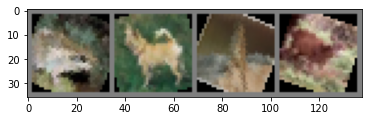

 frog   dog  bird  deer


In [4]:

# function to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

### 1.3 Define NN Model

In [5]:
# your code here

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, kernel_size=(3,3), padding=(1,1))
        self.conv2 = nn.Conv2d(6,9, kernel_size=(3,3), padding=(1,1))
        self.bnorm2 = nn.BatchNorm2d(9)
        
        self.conv3 = nn.Conv2d(9,15, kernel_size=(3,3), padding=(1,1))
        self.conv4 = nn.Conv2d(15,18, kernel_size=(3,3), padding=(1,1))
        self.bnorm4 = nn.BatchNorm2d(18)


        self.pool = nn.MaxPool2d(2, 2)
        
        self.fc1 = nn.Linear(in_features=8*8*18, out_features=128)
        self.fc2 = nn.Linear(in_features=128, out_features=64)
        self.fc3 = nn.Linear(in_features=64, out_features=10)
        

    def forward(self, x):
        x = F.relu(self.conv1(x)) #32*32*6
        x = F.relu(self.bnorm2(self.conv2(x))) #32*32*9
        x = self.pool(x) #16*16*9
        
        x = F.relu(self.conv3(x)) #16*16*15
        x = F.relu(self.bnorm4(self.conv4(x))) #16*16*18
        x = self.pool(x) # 8*8*18
        x = x.view(-1, 8*8*18) # reshape x

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        output = F.log_softmax(x,dim=1)
        return  output


net = Net()

### 1.4 Defining The Loss Function and The Optimizer

In [6]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
#optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
optimizer = optim.Adam(net.parameters(), lr=0.001)

### 1.5 Training the Model

In [7]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True' #change environment - pytorch doesnt work with new macOS
num_epochs = 5 #set the epochs 
for epoch in range(num_epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        
        # zero the parameter gradients
        optimizer.zero_grad()
        
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
print('Finished Training')

/opt/anaconda3/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


[1,  2000] loss: 1.932
[1,  4000] loss: 1.729
[1,  6000] loss: 1.620
[1,  8000] loss: 1.541
[1, 10000] loss: 1.507
[1, 12000] loss: 1.449
[2,  2000] loss: 1.390
[2,  4000] loss: 1.405
[2,  6000] loss: 1.357
[2,  8000] loss: 1.344
[2, 10000] loss: 1.308
[2, 12000] loss: 1.333
[3,  2000] loss: 1.319
[3,  4000] loss: 1.258
[3,  6000] loss: 1.260
[3,  8000] loss: 1.253
[3, 10000] loss: 1.235
[3, 12000] loss: 1.230
[4,  2000] loss: 1.227
[4,  4000] loss: 1.205
[4,  6000] loss: 1.223
[4,  8000] loss: 1.171
[4, 10000] loss: 1.181
[4, 12000] loss: 1.175
[5,  2000] loss: 1.160
[5,  4000] loss: 1.164
[5,  6000] loss: 1.174
[5,  8000] loss: 1.168
[5, 10000] loss: 1.161
[5, 12000] loss: 1.142
Finished Training


### 1.6 Storing the Model

In [8]:
save_model = True
if save_model:
    PATH = './models/cifar_net.pth'
    torch.save(net.state_dict(), PATH)


### 1.7 Evaluating the Trained Model

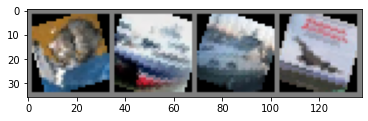

GroundTruth:    cat  ship  ship plane


In [9]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [10]:
net = Net()
net.load_state_dict(torch.load(PATH))

outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Predicted:    cat  ship  ship  ship
Accuracy of the network on the 10000 test images: 58 %


In [12]:
print('Per Class Accuracy')

correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print("Accuracy for class {:5s} is: {:.1f} %".format(classname,
                                                   accuracy))

Per Class Accuracy
Accuracy for class plane is: 57.1 %
Accuracy for class car   is: 68.2 %
Accuracy for class bird  is: 29.4 %
Accuracy for class cat   is: 34.5 %
Accuracy for class deer  is: 49.8 %
Accuracy for class dog   is: 56.4 %
Accuracy for class frog  is: 61.7 %
Accuracy for class horse is: 77.5 %
Accuracy for class ship  is: 79.9 %
Accuracy for class truck is: 68.7 %


### 1.8 Evaluate how large the NN model is
Trying to keep the model file size < 1MB

In [17]:
size = os.path.getsize(PATH)/1000000

print('Size = %.2f MB' %size)

Size = 0.65 MB
